# Data Collection

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Import libraries and metrics
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,roc_curve, classification_report
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [3]:
pd.options.mode.chained_assignment = None

Import Apple Inc Historical data from Jupyter 

In [4]:
dataset = pd.read_csv('AAPL.csv') 
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.296659,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.916719,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.008972,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.887331,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.994274,258529600
...,...,...,...,...,...,...,...
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900


Data Reduction

In [5]:
dataset = dataset.dropna() 
dataset = dataset[['Volume','Open', 'High', 'Low', 'Close']]
dataset

,Volume,Open,High,Low,Close
0,234684800,19.845715,19.893929,19.715000,19.754642
1,392467600,19.745001,19.775000,19.301071,19.320715
2,412610800,19.194643,19.528570,19.057142,19.426071
3,317209200,19.440001,19.498571,19.211430,19.287144
4,258529600,19.243214,19.484285,19.238930,19.409286
...,...,...,...,...,...
2511,37122800,195.179993,195.410004,192.970001,193.600006
2512,28919300,193.610001,193.889999,192.830002,193.050003
2513,48087700,192.490005,193.500000,191.089996,193.149994
2514,34049900,194.139999,194.660004,193.169998,193.580002


Feature Creation

In [8]:
dataset['H-L'] = dataset['High'] - dataset['Low'] 
dataset['O-C'] = dataset['Close'] - dataset['Open'] 

dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean() 
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean() 
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean() 

dataset['Std_dev']= dataset['Close'].rolling(5).std() 

dataset['Price_Rise'] = np.where(dataset['Close'].shift(-1) >dataset['Close'], 1, 0)

dataset = dataset.dropna() 
dataset.head(10)

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
90,159737200,21.142857,21.233570,21.096430,21.205713,0.137140,0.062856,21.028096,21.144786,19.806453,0.126655,1
91,166404000,21.158215,21.335714,21.133572,21.209642,0.202142,0.051427,21.096786,21.149893,19.874333,0.135844,0
92,230846000,21.239286,21.307142,21.001429,21.029285,0.305713,-0.210001,21.195952,21.163393,19.936500,0.130931,1
93,276256400,21.022499,21.340357,20.907143,21.339643,0.433214,0.317144,21.148213,21.153893,19.991583,0.110851,1
94,317755200,21.351786,21.690357,21.333214,21.592501,0.357143,0.240715,21.192857,21.171500,20.061488,0.208826,1
95,234836000,21.589643,21.657143,21.454643,21.596786,0.202500,0.007143,21.320476,21.184464,20.148119,0.246126,1
96,196859600,21.565357,21.667856,21.502144,21.653929,0.165712,0.088572,21.509643,21.221250,20.244834,0.260928,1
97,200760000,21.664286,21.780357,21.575001,21.688213,0.205356,0.023927,21.614405,21.271179,20.343488,0.137129,1
98,232209600,21.687500,21.954643,21.659643,21.933214,0.295000,0.245714,21.646309,21.340036,20.435095,0.140187,1
99,348866000,21.995714,22.352142,21.986786,22.343929,0.365356,0.348215,21.758452,21.442143,20.543012,0.307976,0


 Exploratory Data Analysis (EDA) of the above features

Figure 1:Plots Close Price and Volume

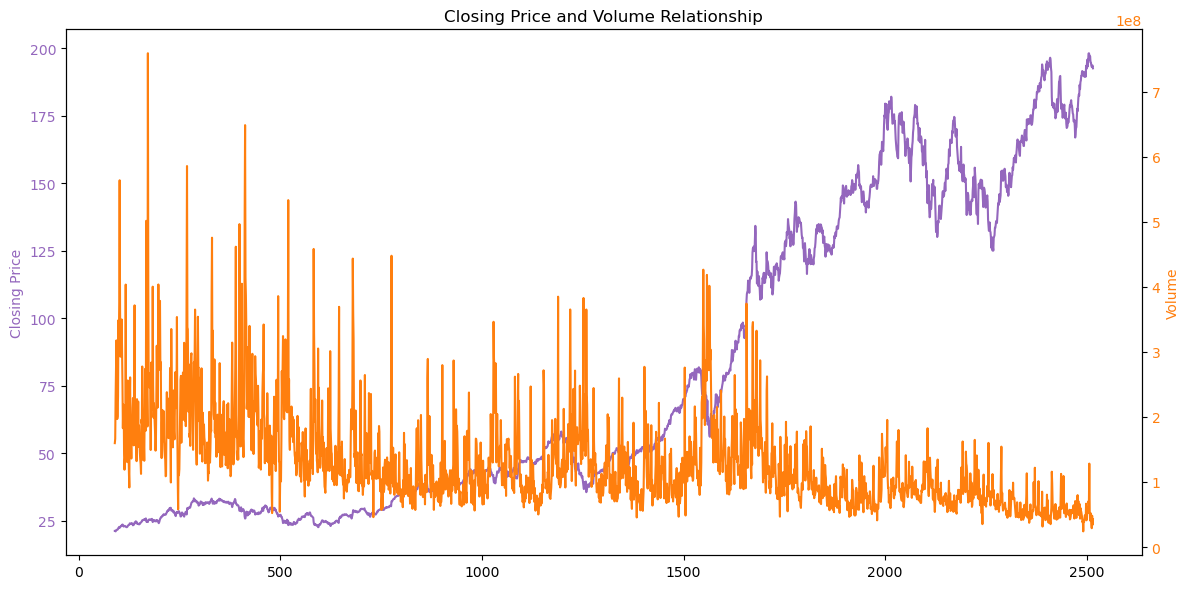

In [9]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:purple'
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(dataset['Close'], label='Close', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Volume', color=color)
ax2.plot(dataset['Volume'], label='Volume', color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Closing Price and Volume Relationship')
fig.tight_layout()
plt.show()

Figure 2: Plot for 3day, 10day,30day MA

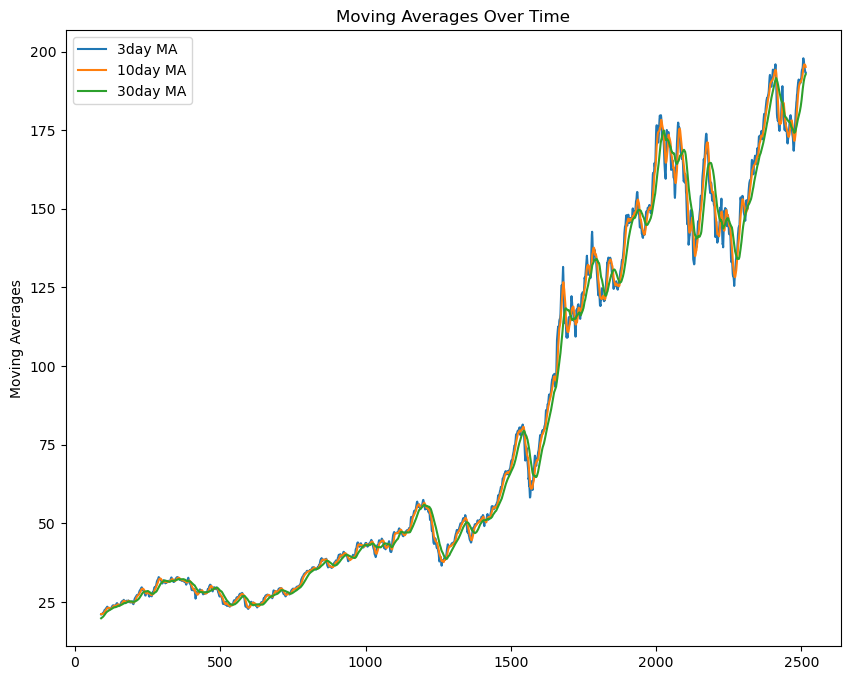

In [10]:
plt.figure(figsize=(10,8 ))

plt.plot(dataset['3day MA'], label='3day MA')
plt.plot(dataset['10day MA'], label='10day MA')
plt.plot(dataset['30day MA'], label='30day MA')

plt.title('Moving Averages Over Time')
plt.ylabel('Moving Averages')
plt.legend()
plt.show()

Figure 3: Plots for O-C,H-L and Std_dev

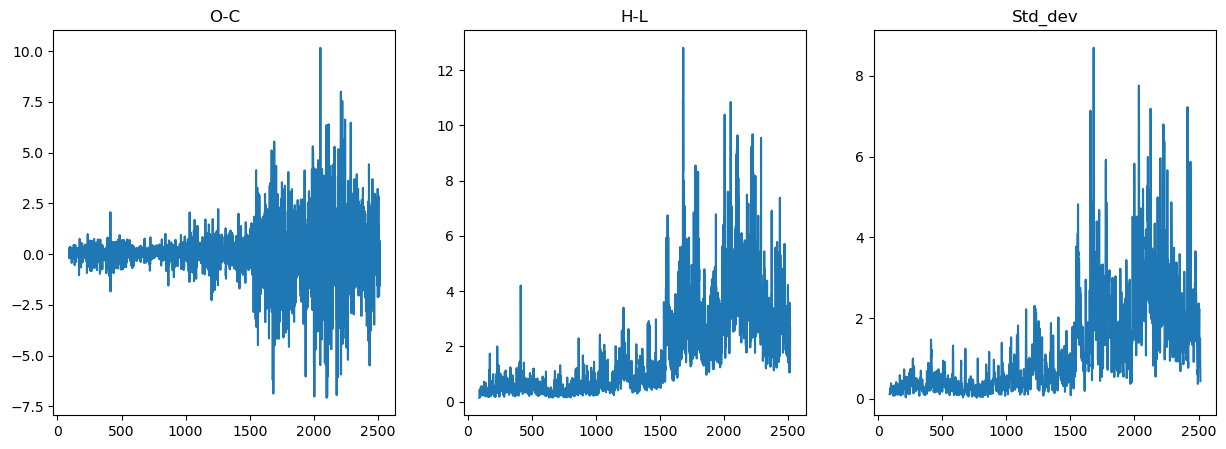

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(dataset['O-C'])
axes[0].set_title('O-C')
axes[1].plot(dataset['H-L'])
axes[1].set_title('H-L')
axes[2].plot(dataset['Std_dev'])
axes[2].set_title('Std_dev')

plt.show()

Figure 4: 3day, 10day,30day MA histogram and density

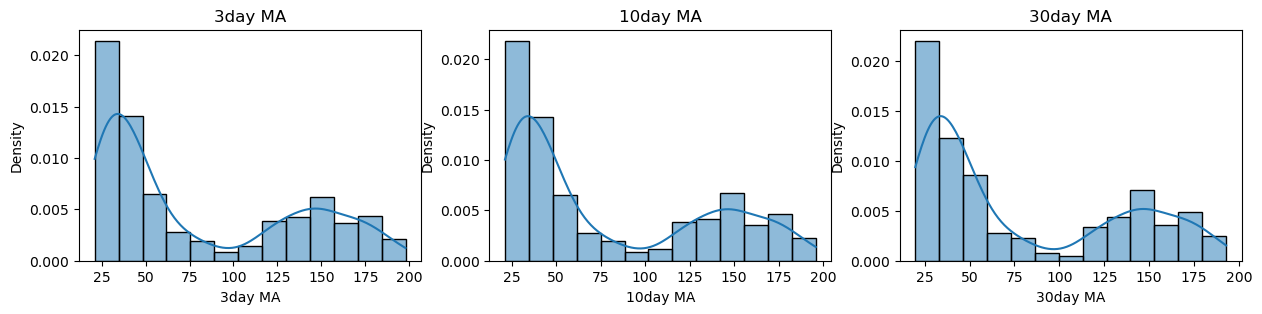

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))  # 1 row, 3 columns

sns.histplot(data=dataset, x="3day MA", kde=True, stat="density", ax=axes[0])
axes[0].set_title('3day MA')

sns.histplot(data=dataset, x="10day MA", kde=True, stat="density", ax=axes[1])
axes[1].set_title('10day MA')

sns.histplot(data=dataset, x="30day MA", kde=True, stat="density", ax=axes[2])
axes[2].set_title('30day MA')

plt.show()

Figure 5: 3day, 10day,30day MA histogram and distribution

C:\Users\ibiro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ibiro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


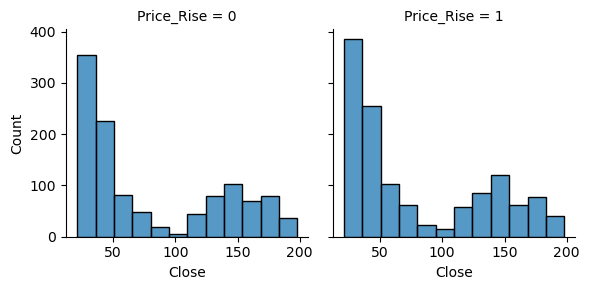

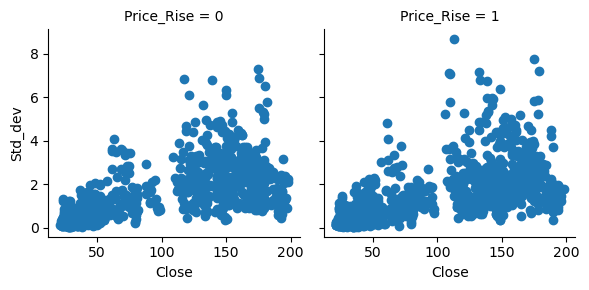

In [13]:
chart = sns.FacetGrid(dataset, col='Price_Rise')  
chart.map(sns.histplot, 'Close') 

chart = sns.FacetGrid(dataset, col='Price_Rise')  
chart.map(plt.scatter, 'Close','Std_dev') 

Fig 6: Descriptive Statistics of the Data set (description and information)

In [14]:
dataset.describe()

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
count,2.426000e+03,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000
mean,1.301129e+08,80.030016,80.903678,79.209257,80.096122,1.694421,0.066105,79.954385,79.704674,78.986858,1.209724,0.528030
std,7.377009e+07,56.037982,56.672255,55.450825,56.092821,1.647670,1.434638,56.012411,55.857634,55.415574,1.226875,0.499317
min,2.404830e+07,21.022499,21.233570,20.907143,21.029285,0.137140,-7.080002,21.028096,21.144786,19.806453,0.027760,0.000000
25%,8.024070e+07,31.528125,31.790000,31.290626,31.550625,0.482500,-0.346875,31.540209,31.482250,31.431896,0.329943,0.000000
50%,1.097090e+08,50.173749,50.747501,49.797499,50.342500,0.973750,0.045000,50.331250,50.190625,49.494500,0.726147,1.000000
75%,1.600757e+08,136.570004,138.010002,134.542496,136.749997,2.550003,0.469997,136.401668,136.527751,135.038667,1.753252,1.000000
max,7.593852e+08,198.020004,199.619995,197.000000,198.110001,12.809998,10.160003,197.880005,195.958002,192.797667,8.694094,1.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2426 entries, 90 to 2515
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Volume      2426 non-null   int64  
 1   Open        2426 non-null   float64
 2   High        2426 non-null   float64
 3   Low         2426 non-null   float64
 4   Close       2426 non-null   float64
 5   H-L         2426 non-null   float64
 6   O-C         2426 non-null   float64
 7   3day MA     2426 non-null   float64
 8   10day MA    2426 non-null   float64
 9   30day MA    2426 non-null   float64
 10  Std_dev     2426 non-null   float64
 11  Price_Rise  2426 non-null   int32  
dtypes: float64(10), int32(1), int64(1)
memory usage: 236.9 KB


Fig 7: Correlation matrix of data variables

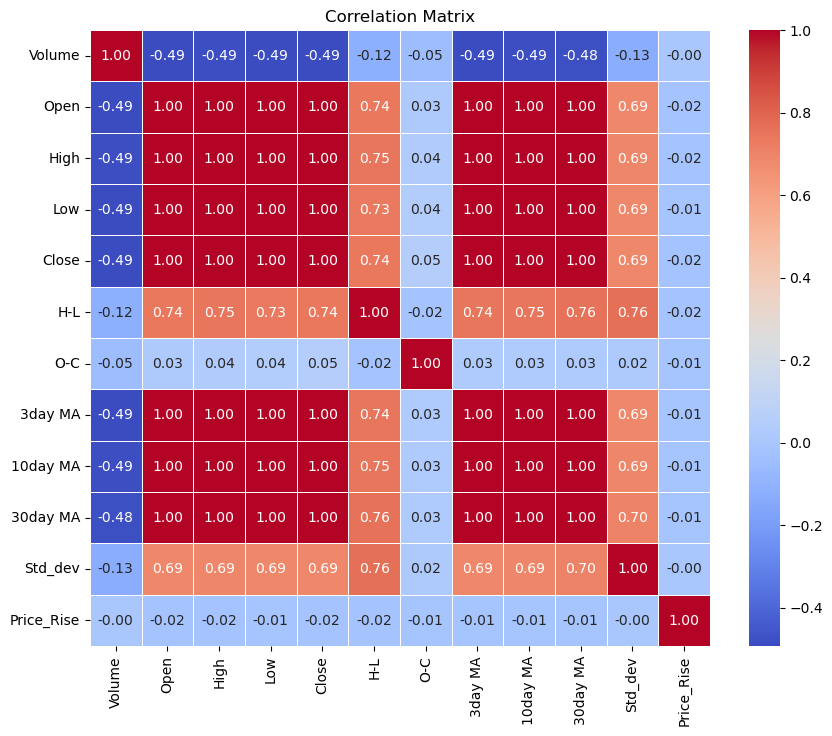

In [16]:
corr_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

4.Machine Learning Classification Methods

In [17]:
#Set target variable y(Price_Rise 0 or 1 )and features x 
#(from H-L column to Std_dev column)
X = dataset.iloc[:, 5:-1] 
Y = dataset.iloc[:, -1]

In [18]:
X

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
90,0.137140,0.062856,21.028096,21.144786,19.806453,0.126655
91,0.202142,0.051427,21.096786,21.149893,19.874333,0.135844
92,0.305713,-0.210001,21.195952,21.163393,19.936500,0.130931
93,0.433214,0.317144,21.148213,21.153893,19.991583,0.110851
94,0.357143,0.240715,21.192857,21.171500,20.061488,0.208826
...,...,...,...,...,...,...
2511,2.440003,-1.579987,195.483332,195.958002,191.720000,1.271836
2512,1.059997,-0.559998,194.370000,195.747002,192.093000,1.494606
2513,2.410004,0.659989,193.776667,195.734003,192.314667,0.842774
2514,1.490006,-0.559997,193.266668,195.578001,192.593000,0.646349


In [19]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                   shuffle=False)
X_test

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
2030,5.739991,0.800003,162.846665,169.263001,173.836000,2.514626
2031,6.569992,-3.809998,161.269999,168.022000,173.180333,2.005309
2032,5.559997,-3.229996,160.363332,166.483000,172.645333,1.387959
2033,7.550003,4.619995,159.563334,164.852000,172.141667,4.675583
2034,5.490005,4.619995,163.080002,164.666000,171.842667,7.290785
...,...,...,...,...,...,...
2511,2.440003,-1.579987,195.483332,195.958002,191.720000,1.271836
2512,1.059997,-0.559998,194.370000,195.747002,192.093000,1.494606
2513,2.410004,0.659989,193.776667,195.734003,192.314667,0.842774
2514,1.490006,-0.559997,193.266668,195.578001,192.593000,0.646349


In [20]:
# Standardize the features (optional but can be beneficial for 
#logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [21]:
# Model
modellr = LogisticRegression(random_state=101)
# Train the model
modellr.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modellr.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.44      0.31      0.36       235
           1       0.50      0.63      0.56       251

    accuracy                           0.48       486
   macro avg       0.47      0.47      0.46       486
weighted avg       0.47      0.48      0.46       486



Extra Trees

In [23]:
#Model
modelet = ExtraTreesClassifier(random_state=101)
# Train the model
modelet.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modelet.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       235
           1       0.51      0.52      0.52       251

    accuracy                           0.49       486
   macro avg       0.49      0.49      0.49       486
weighted avg       0.49      0.49      0.49       486



Cross Validation

Cross Validation for Logistic Regression

In [24]:
accuracy_scores = cross_val_score(modellr, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Print mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.51
Standard Deviation: 0.03


Cross Validation for Extra Tree

In [25]:
accuracy_scores = cross_val_score(modelet, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation Accuracy: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.48
Standard Deviation Accuracy: 0.01


.Prediction of Price Rise Using Extra Trees on X_test Data

In [26]:
modelet = ExtraTreesClassifier(random_state=101)
modelet.fit(X_train, Y_train)
Y_pred = modelet.predict(X_test)

classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.46      0.47       235
           1       0.51      0.52      0.52       251

    accuracy                           0.49       486
   macro avg       0.49      0.49      0.49       486
weighted avg       0.49      0.49      0.49       486



Confusion Matrix of the modelet(Extra Tree classification model)

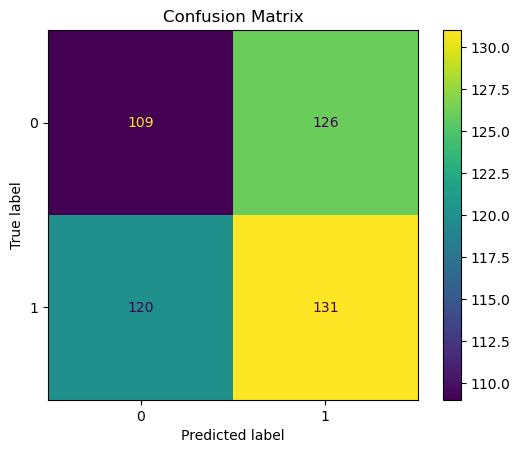

In [27]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Evaluate the modelet by means of a Confusion Matrix
matrix = ConfusionMatrixDisplay.from_estimator(modelet, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

Roc Curve of the modelet(Extra Tree classification model)

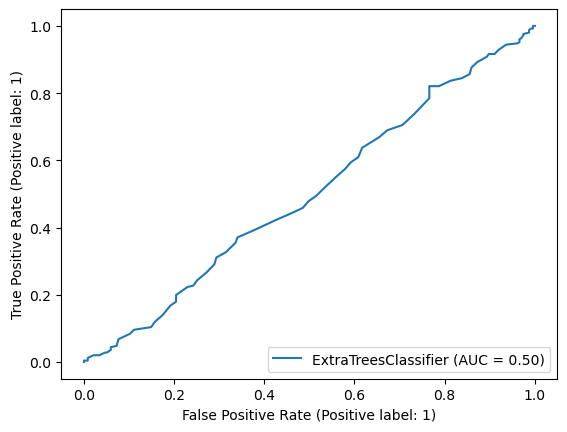

In [28]:
# ROC Curve
log_disp = RocCurveDisplay.from_estimator(modelet, X_test, Y_test)

Importance of classifiers in modelet

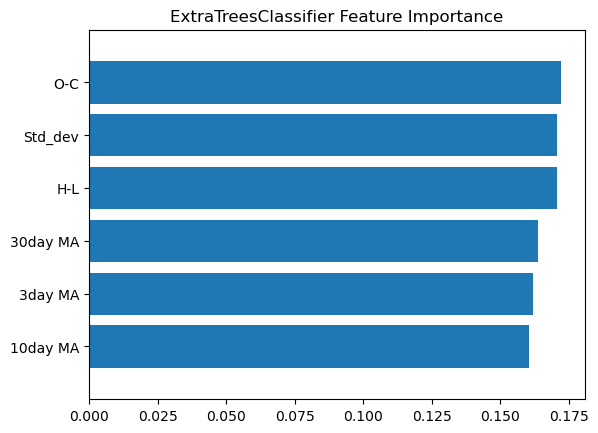

In [29]:
#Importance of classifiers 
feature_names=X.columns
importance = modelet.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("ExtraTreesClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

Market and Return Strategies

In [30]:
#Create new column Y_pred
dataset['Y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_pred)):,-1] = Y_pred
trade_dataset = dataset.dropna()
trade_dataset

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred
2030,115798400,158.979996,162.759995,157.020004,159.779999,5.739991,0.800003,162.846665,169.263001,173.836000,2.514626,0,0.0
2031,108275300,163.500000,164.389999,157.820007,159.690002,6.569992,-3.809998,161.269999,168.022000,173.180333,2.005309,0,0.0
2032,121954600,162.449997,163.839996,158.279999,159.220001,5.559997,-3.229996,160.363332,166.483000,172.645333,1.387959,1,1.0
2033,179935700,165.710007,170.350006,162.800003,170.330002,7.550003,4.619995,159.563334,164.852000,172.141667,4.675583,1,0.0
2034,115541600,170.160004,175.000000,169.509995,174.779999,5.490005,4.619995,163.080002,164.666000,171.842667,7.290785,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,37122800,195.179993,195.410004,192.970001,193.600006,2.440003,-1.579987,195.483332,195.958002,191.720000,1.271836,0,0.0
2512,28919300,193.610001,193.889999,192.830002,193.050003,1.059997,-0.559998,194.370000,195.747002,192.093000,1.494606,1,1.0
2513,48087700,192.490005,193.500000,191.089996,193.149994,2.410004,0.659989,193.776667,195.734003,192.314667,0.842774,1,0.0
2514,34049900,194.139999,194.660004,193.169998,193.580002,1.490006,-0.559997,193.266668,195.578001,192.593000,0.646349,0,1.0


Calculating market returns

In [31]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)
trade_dataset

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns
2030,115798400,158.979996,162.759995,157.020004,159.779999,5.739991,0.800003,162.846665,169.263001,173.836000,2.514626,0,0.0,-0.000563
2031,108275300,163.500000,164.389999,157.820007,159.690002,6.569992,-3.809998,161.269999,168.022000,173.180333,2.005309,0,0.0,-0.002948
2032,121954600,162.449997,163.839996,158.279999,159.220001,5.559997,-3.229996,160.363332,166.483000,172.645333,1.387959,1,1.0,0.067451
2033,179935700,165.710007,170.350006,162.800003,170.330002,7.550003,4.619995,159.563334,164.852000,172.141667,4.675583,1,0.0,0.025790
2034,115541600,170.160004,175.000000,169.509995,174.779999,5.490005,4.619995,163.080002,164.666000,171.842667,7.290785,0,0.0,-0.000973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,37122800,195.179993,195.410004,192.970001,193.600006,2.440003,-1.579987,195.483332,195.958002,191.720000,1.271836,0,0.0,-0.002845
2512,28919300,193.610001,193.889999,192.830002,193.050003,1.059997,-0.559998,194.370000,195.747002,192.093000,1.494606,1,1.0,0.000518
2513,48087700,192.490005,193.500000,191.089996,193.149994,2.410004,0.659989,193.776667,195.734003,192.314667,0.842774,1,0.0,0.002224
2514,34049900,194.139999,194.660004,193.169998,193.580002,1.490006,-0.559997,193.266668,195.578001,192.593000,0.646349,0,1.0,-0.005439


Calculating strategy returns

In [32]:
#Strategy Returns based on Y_Pred
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['Y_pred'] == True,
                                 trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])
trade_dataset

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns,Strategy Returns
2030,115798400,158.979996,162.759995,157.020004,159.779999,5.739991,0.800003,162.846665,169.263001,173.836000,2.514626,0,0.0,-0.000563,0.000563
2031,108275300,163.500000,164.389999,157.820007,159.690002,6.569992,-3.809998,161.269999,168.022000,173.180333,2.005309,0,0.0,-0.002948,0.002948
2032,121954600,162.449997,163.839996,158.279999,159.220001,5.559997,-3.229996,160.363332,166.483000,172.645333,1.387959,1,1.0,0.067451,0.067451
2033,179935700,165.710007,170.350006,162.800003,170.330002,7.550003,4.619995,159.563334,164.852000,172.141667,4.675583,1,0.0,0.025790,-0.025790
2034,115541600,170.160004,175.000000,169.509995,174.779999,5.490005,4.619995,163.080002,164.666000,171.842667,7.290785,0,0.0,-0.000973,0.000973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,37122800,195.179993,195.410004,192.970001,193.600006,2.440003,-1.579987,195.483332,195.958002,191.720000,1.271836,0,0.0,-0.002845,0.002845
2512,28919300,193.610001,193.889999,192.830002,193.050003,1.059997,-0.559998,194.370000,195.747002,192.093000,1.494606,1,1.0,0.000518,0.000518
2513,48087700,192.490005,193.500000,191.089996,193.149994,2.410004,0.659989,193.776667,195.734003,192.314667,0.842774,1,0.0,0.002224,-0.002224
2514,34049900,194.139999,194.660004,193.169998,193.580002,1.490006,-0.559997,193.266668,195.578001,192.593000,0.646349,0,1.0,-0.005439,-0.005439


Cummulative Market and Strategies Returns

In [33]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

Plot of cummulative market and strategy returns based on Y_prediction

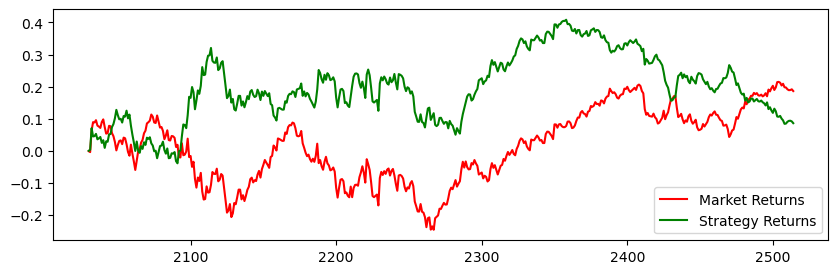

In [35]:
plt.figure(figsize=(10,3))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()